In [40]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 고객데이터 불러오기

In [42]:
customer_data=pd.read_csv('./Member_data02.csv')
# id 결측치 제거
customer_data.dropna(subset=['ID'],inplace=True)
# id string 형태로 변경
customer_data['ID']=customer_data['ID'].apply(lambda x: str(int(x)))
# 연령 int 형태로 변경
customer_data['연령']=customer_data['연령'].apply(lambda x: int(x))
customer_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31,국민은행,오픈마켓,Yes
81090,201912291058167,여,기혼,경남,37,롯데카드,오픈마켓,Yes
81091,201912291058168,여,기혼,충북,26,삼성카드,검색광고,Yes
81092,201912291058169,여,기혼,경기,32,새마을금고,인스타그램,Yes


In [43]:
customer_data['연령대']=customer_data['연령'].apply(lambda x: (x//10)*10)
customer_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,연령대
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,30
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes,30
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,30
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,30
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes,30
...,...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31,국민은행,오픈마켓,Yes,30
81090,201912291058167,여,기혼,경남,37,롯데카드,오픈마켓,Yes,30
81091,201912291058168,여,기혼,충북,26,삼성카드,검색광고,Yes,20
81092,201912291058169,여,기혼,경기,32,새마을금고,인스타그램,Yes,30


In [44]:
customer_data.groupby('유입경로').count()['ID'].sort_values(ascending=False)

유입경로
인스타그램     31167
네이버블로그    22684
검색광고       8259
지인추천       8021
네이버카페      5725
오픈마켓       2022
페이스북       1405
직접검색       1137
매장쿠폰        456
이마트         218
Name: ID, dtype: int64

[31167 22684  8259  8021 10963]


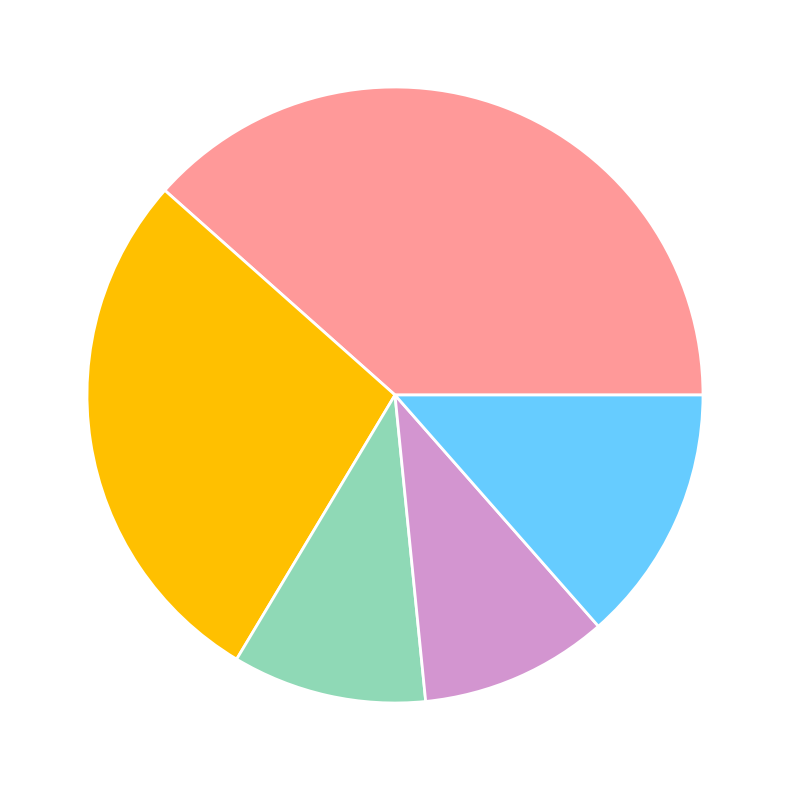

In [45]:
import numpy as np
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#66ccff','silver', 'lightgray']
plt.figure(figsize=(15,10))
data=np.append(customer_data.groupby('유입경로').count()['ID'].sort_values(ascending=False).values[:4],[10963])
print(data)
plt.pie(data,colors=colors,wedgeprops = {"edgecolor" : "white",'linewidth': 2,'antialiased': True})
plt.show()

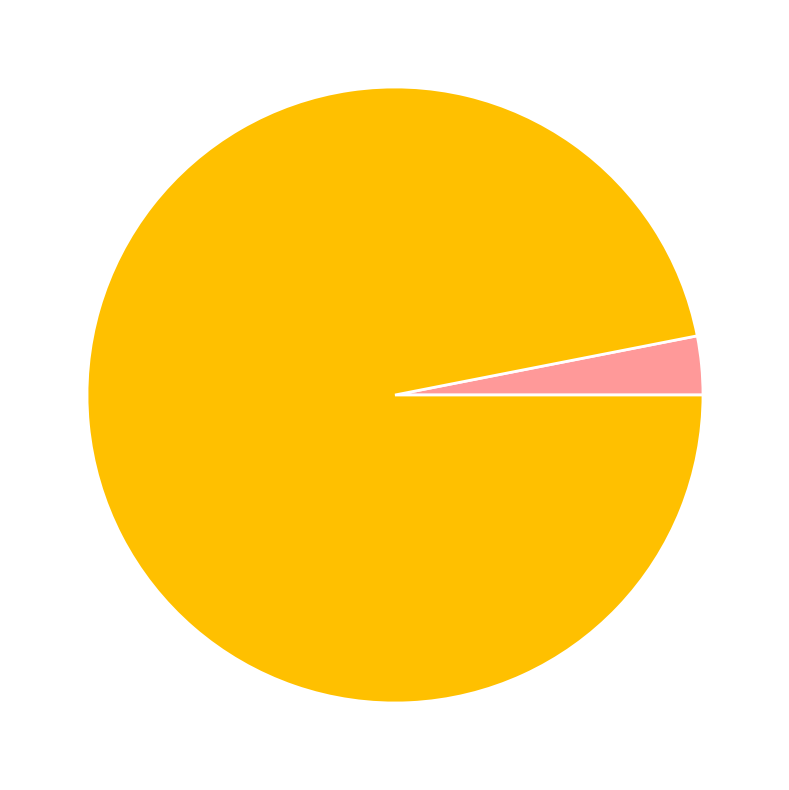

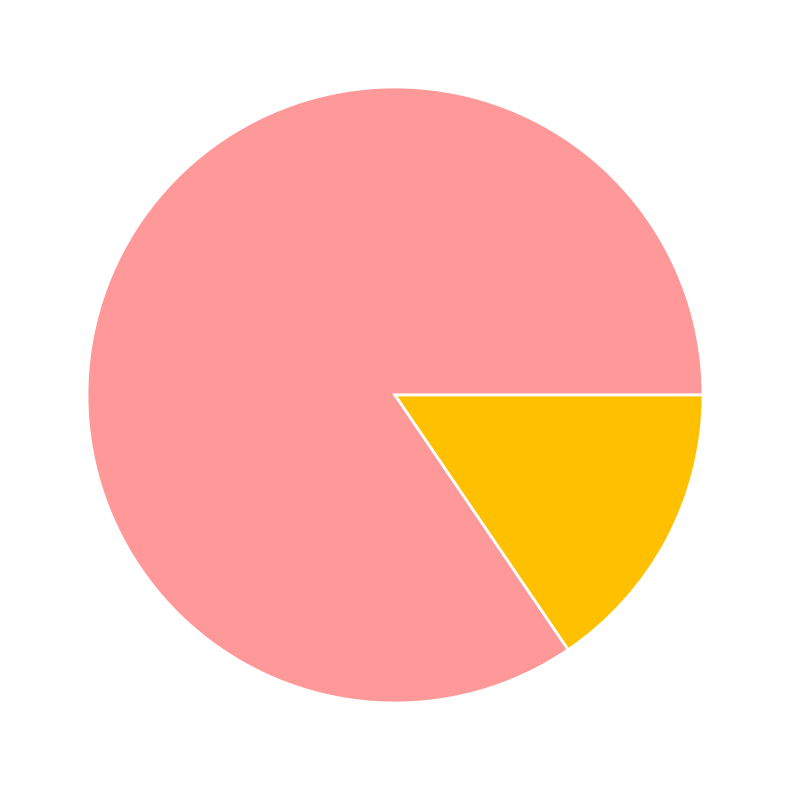

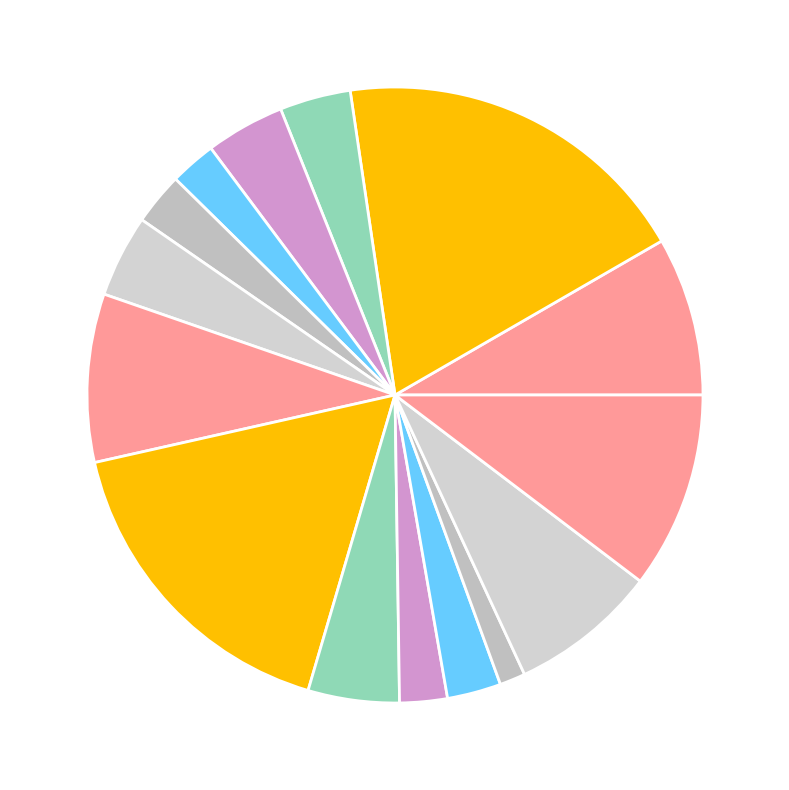

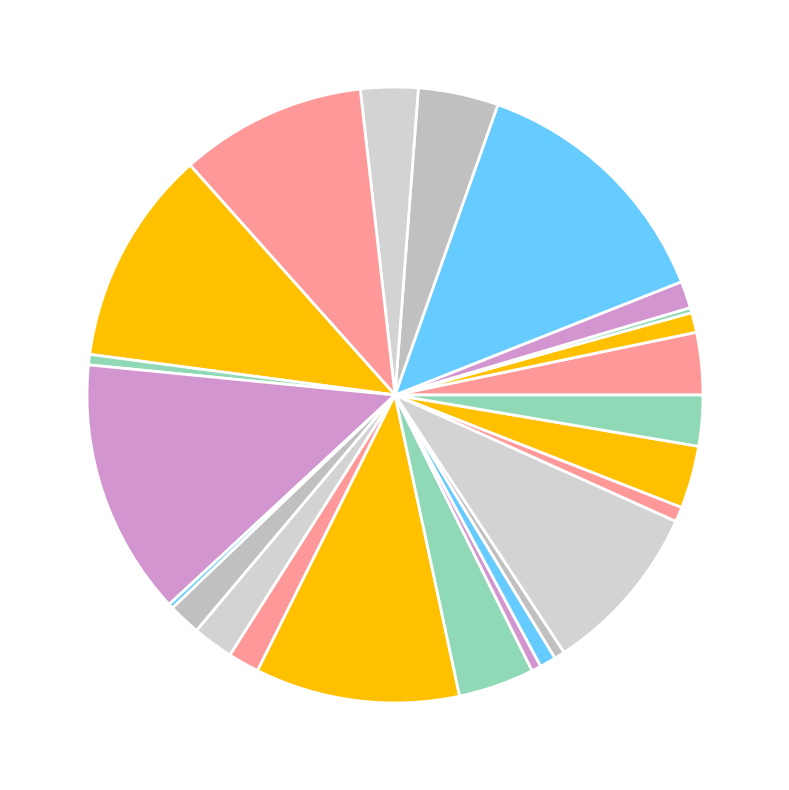

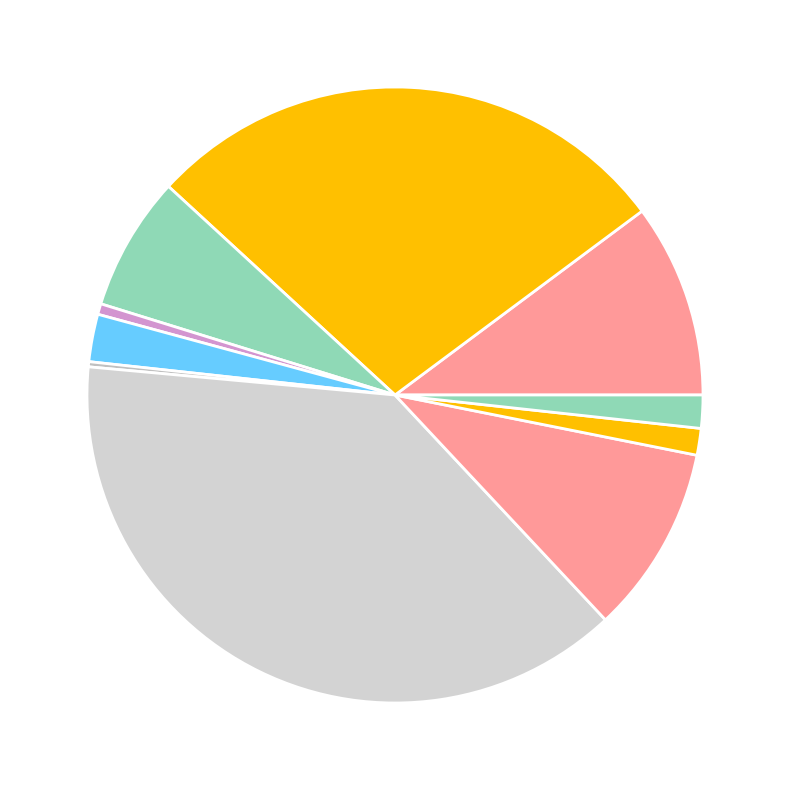

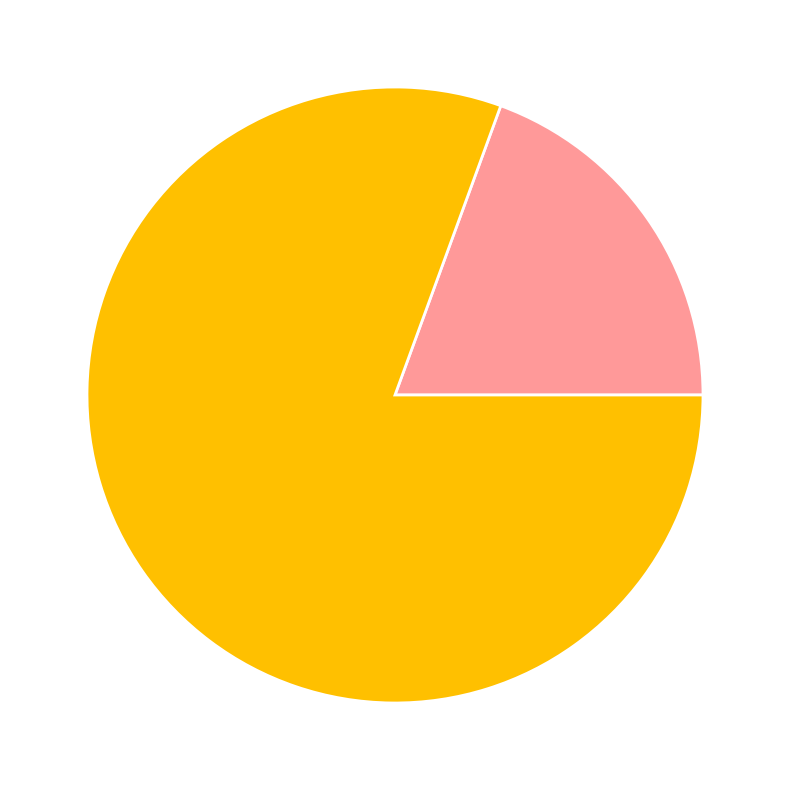

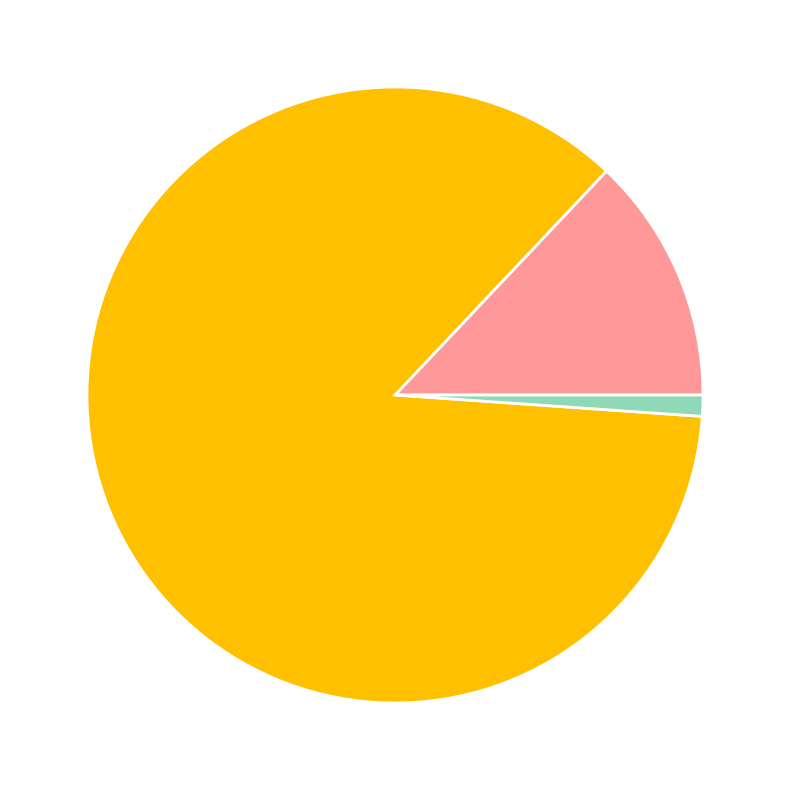

In [46]:
pie_chart_list=['성별','결혼유무','거주지역','결제등록카드','유입경로','자녀여부','연령대']

for i in range(len(pie_chart_list)):
    plt.figure(figsize=(15,10))
    data=customer_data.groupby(pie_chart_list[i]).count()['ID']
    # plt.subplot(2,4,i+1)
    plt.pie(data,colors=colors,wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True})
plt.show()


In [47]:
product_data=pd.read_csv('./Product_data.csv')
product_data

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994


C:\Users\king\AppData\Local\Temp\ipykernel_13984\1115299702.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=product_data.groupby('물품대분류').sum()['물품판매량']


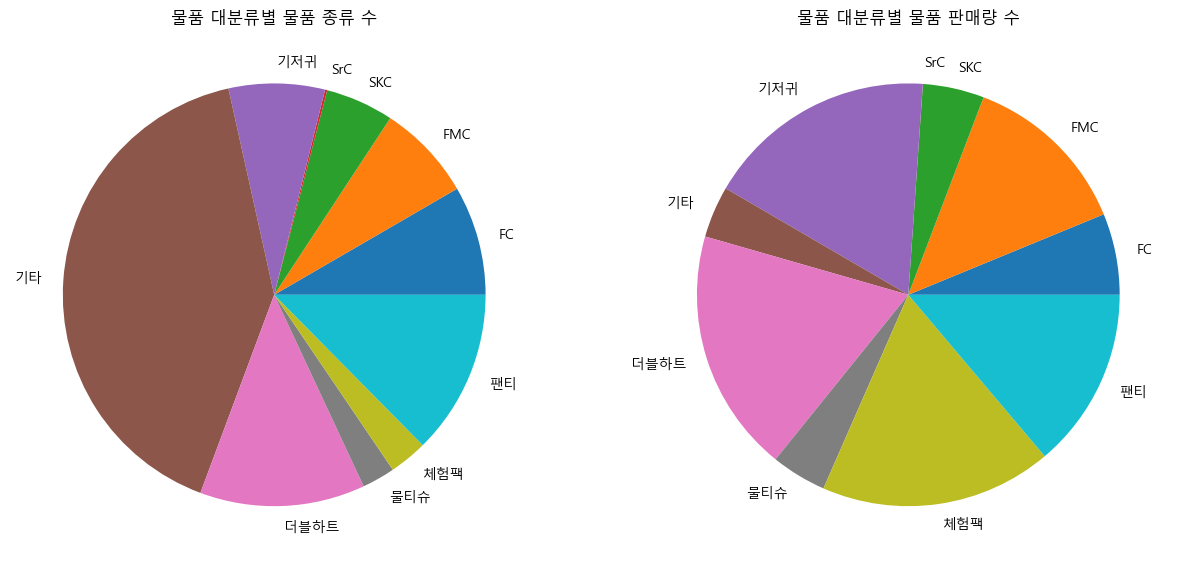

In [48]:
plt.figure(figsize=(15,10))
data=product_data.groupby('물품대분류').count()['상품명']
plt.subplot(121)
plt.title('물품 대분류별 물품 종류 수')
plt.pie(data,labels=data.index)

data=product_data.groupby('물품대분류').sum()['물품판매량']
plt.subplot(122)
plt.pie(data,labels=data.index)
plt.title('물품 대분류별 물품 판매량 수')
plt.show()

C:\Users\king\AppData\Local\Temp\ipykernel_13984\4284706390.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=product_data.groupby('물품대분류').mean()['제품단가']


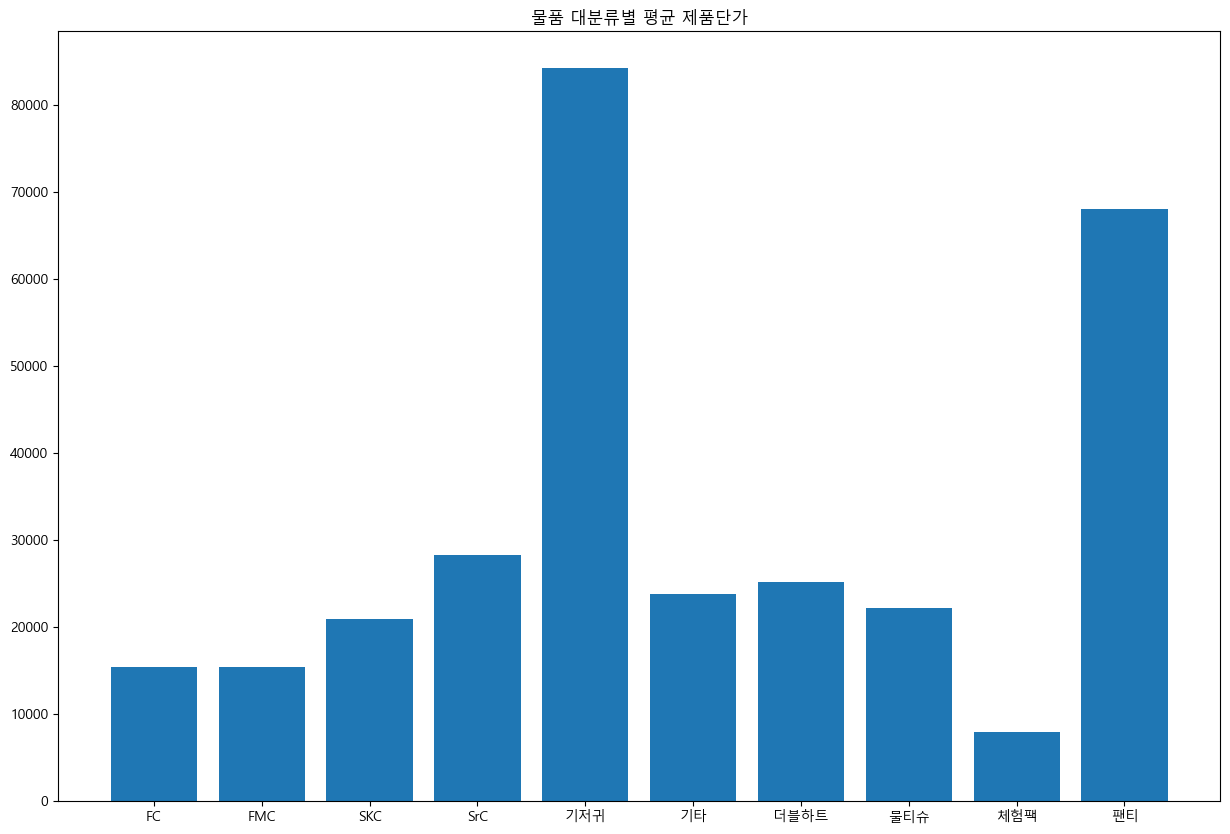

In [49]:
plt.figure(figsize=(15,10))
data=product_data.groupby('물품대분류').mean()['제품단가']
plt.bar(data.index,data)
plt.title('물품 대분류별 평균 제품단가')
plt.show()

In [50]:
sales_data=pd.read_csv('./Sales_data02.csv').astype({'구매일':'datetime64','배송시작일':'datetime64','배송완료일':'datetime64','고객번호':'str'})
sales_data

C:\Users\king\AppData\Local\Temp\ipykernel_13984\2701945432.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data=pd.read_csv('./Sales_data02.csv').astype({'구매일':'datetime64','배송시작일':'datetime64','배송완료일':'datetime64','고객번호':'str'})


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스


In [51]:
sales_data['구매연월']=sales_data['구매일'].dt.strftime('%Y-%m')
sales_data

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매연월
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2019-05
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),2020-02
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,2019-02
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),2019-05
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),2019-05
...,...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),2020-07
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,2020-07
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),2020-08
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,2020-08


C:\Users\king\AppData\Local\Temp\ipykernel_13984\2223804471.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=sales_data.groupby('구매연월').sum()['결제금액']
C:\Users\king\AppData\Local\Temp\ipykernel_13984\2223804471.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


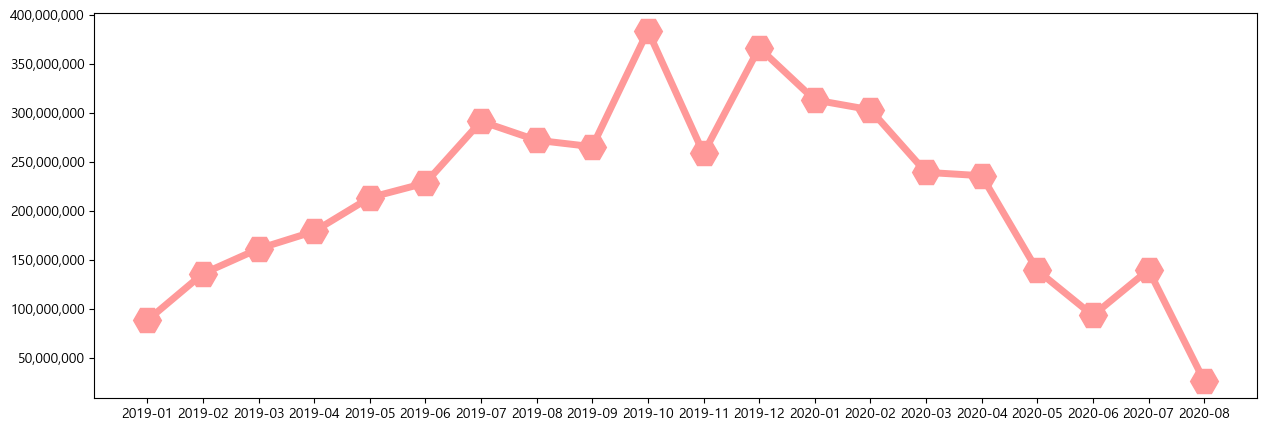

In [52]:
plt.figure(figsize=(15,5))
data=sales_data.groupby('구매연월').sum()['결제금액']
plt.plot(data,color="#ff9999",linewidth=5, solid_capstyle='round',marker='H',markersize=20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\king\AppData\Local\Temp\ipykernel_13984\3556284210.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


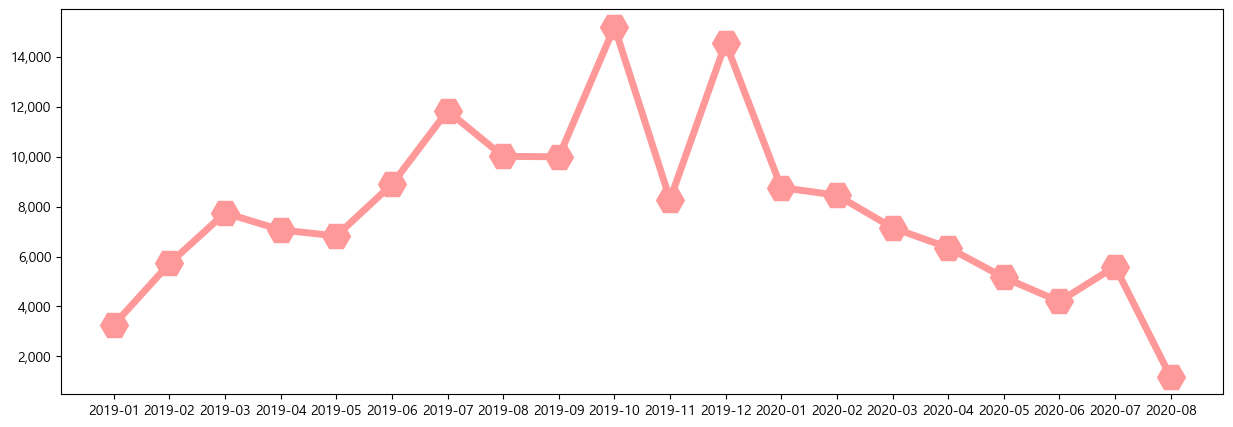

In [53]:
plt.figure(figsize=(15,5))
data=sales_data.groupby('구매연월').nunique()['고객번호']
plt.plot(data,color="#ff9999",linewidth=5, solid_capstyle='round',marker='H',markersize=20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [54]:
data.sort_values(ascending=False)

구매연월
2019-10    15200
2019-12    14555
2019-07    11835
2019-08    10011
2019-09     9995
2019-06     8891
2020-01     8760
2020-02     8457
2019-11     8279
2019-03     7746
2020-03     7153
2019-04     7067
2019-05     6826
2020-04     6359
2019-02     5722
2020-07     5600
2020-05     5163
2020-06     4204
2019-01     3264
2020-08     1186
Name: 고객번호, dtype: int64

In [55]:
sales_data[sales_data['구매일']=='2019-10-11'].groupby('상품명').count()['주문번호'].sort_values(ascending=False).head(30)

상품명
더블하트 SofTouch 모유실감 젖꼭지 L (2입)                                     316
더블하트 SofTouch 모유실감 노꼭지 트윈팩 240ml(오렌지)                             265
더블하트 SofTouch 모유실감 젖꼭지 M (2입)                                     258
더블하트 SofTouch 모유실감 젖꼭지 LL (2입)                                    245
더블하트 SofTouch 모유실감 젖꼭지 S (2입)                                     194
맘큐 허그박스                                                           138
더블하트 SofTouch 모유실감 노꼭지 트윈팩 160ml(오렌지)                              84
더블하트 SofTouch 모유실감 젖꼭지 SS 1입                                       75
더블하트 SofTouch 모유실감 젖병 핸들(옐로우)                                      55
더블하트 허니콤 수유패드 144매                                                 37
더블하트 SofTouch 모유실감 젖병 240ml (M사이즈, 꿀벌)                             33
더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형                                   27
더블하트 SofTouch 모유실감 젖병 160ml (S사이즈, 토이)                             26
더블하트 SofTouch 모유실감 젖병 240ml (L사이즈, 오렌지)                            25
더블하트 SofTouch 모유

In [56]:
sales_data['요일코드']=sales_data['구매일'].apply(lambda x: x.weekday())
sales_data

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매연월,요일코드
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2019-05,0
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),2020-02,3
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,2019-02,3
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),2019-05,0
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),2019-05,4
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),2020-07,4
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,2020-07,2
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),2020-08,0
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,2020-08,3


C:\Users\king\AppData\Local\Temp\ipykernel_13984\1202219932.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=sales_data.groupby('요일코드').sum()['결제금액']


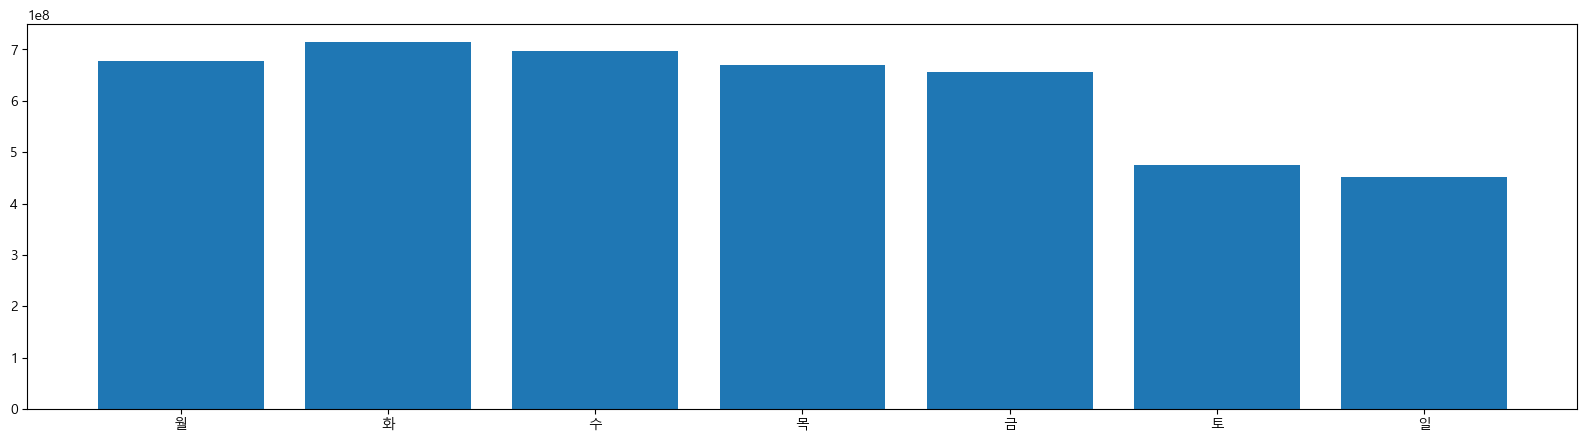

In [57]:
plt.figure(figsize=(20,5))

data=sales_data.groupby('요일코드').sum()['결제금액']
plt.bar(['월','화','수','목','금','토','일'],data)

plt.show()

In [58]:
sales_data['구매일자']=sales_data['구매일'].dt.strftime('%d')
sales_data

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매연월,요일코드,구매일자
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2019-05,0,06
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),2020-02,3,20
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,2019-02,3,28
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),2019-05,0,13
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),2019-05,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),2020-07,4,24
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,2020-07,2,29
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),2020-08,0,03
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,2020-08,3,06


C:\Users\king\AppData\Local\Temp\ipykernel_13984\4084926818.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=sales_data.groupby('구매일자').sum()['결제금액']


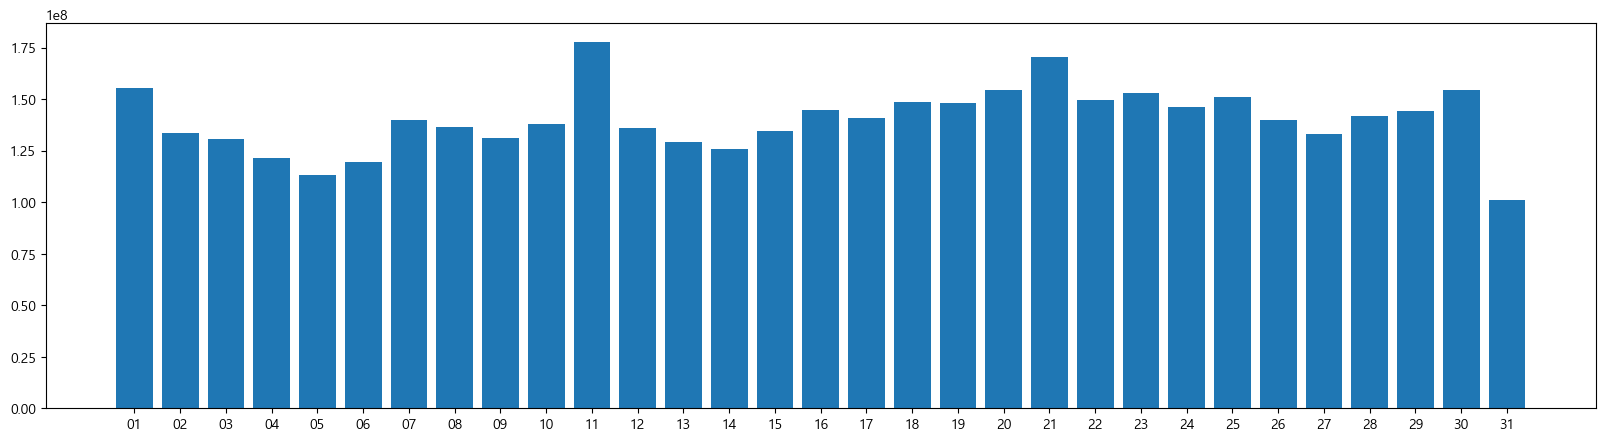

In [59]:
plt.figure(figsize=(20,5))

data=sales_data.groupby('구매일자').sum()['결제금액']
plt.bar(data.index,data)

plt.show()

In [60]:
sales_pivot_customer=pd.pivot_table(sales_data,index=['고객번호'],columns=['구매연월'],values=['결제금액'],aggfunc='count').fillna(0)
sales_pivot_customer

결제금액                                                  \
구매연월                 2019-01 2019-02 2019-03 2019-04 2019-05 2019-06 2019-07   
고객번호                                                                           
201812310749735          0.0     0.0     0.0     0.0     1.0     0.0     0.0   
201812310749770          0.0     1.0     0.0     0.0     0.0     0.0     0.0   
201812310749771          0.0     0.0     0.0     0.0     1.0     0.0     0.0   
201812310749774          0.0     0.0     0.0     0.0     1.0     0.0     1.0   
201812310749780          1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                      ...     ...     ...     ...     ...     ...     ...   
20200724113017315991     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200729134409126553     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200803075905757887     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200805170229147688     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200805223526494551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                                                                              \
구매연월                 2019-08 2019-09 2019-10 2019-11 2019-12 2020-01 2020-02   
고객번호                                                                           
201812310749735          0.0     0.0     0.0     0.0     0.0     0.0     1.0   
201812310749770          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
201812310749771          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
201812310749774          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
201812310749780          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                      ...     ...     ...     ...     ...     ...     ...   
20200724113017315991     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200729134409126553     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200803075905757887     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200805170229147688     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200805223526494551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                                                                      
구매연월                 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08  
고객번호                                                                  
201812310749735          0.0     0.0     0.0     0.0     0.0     0.0  
201812310749770          0.0     0.0     0.0     0.0     0.0     0.0  
201812310749771          0.0     0.0     0.0     0.0     0.0     0.0  
201812310749774          0.0     0.0     0.0     0.0     0.0     0.0  
201812310749780          0.0     0.0     0.0     0.0     0.0     0.0  
...                      ...     ...     ...     ...     ...     ...  
20200724113017315991     0.0     0.0     0.0     0.0     1.0     0.0  
20200729134409126553     0.0     0.0     0.0     0.0     1.0     0.0  
20200803075905757887     0.0     0.0     0.0     0.0     0.0     1.0  
20200805170229147688     0.0     0.0     0.0     0.0     0.0     1.0  
20200805223526494551     0.0     0.0     0.0     0.0     0.0     1.0  

[81360 rows x 20 columns]

In [61]:
sales_pivot_customer['결제금액'].index

Index(['201812310749735', '201812310749770', '201812310749771',
       '201812310749774', '201812310749780', '201812310749783',
       '201812310749784', '201812310749787', '201812310749792',
       '201812310749802',
       ...
       '20200705213917994947', '20200708231025349606', '20200721194641507158',
       '20200722141538955000', '20200724095212627384', '20200724113017315991',
       '20200729134409126553', '20200803075905757887', '20200805170229147688',
       '20200805223526494551'],
      dtype='object', name='고객번호', length=81360)

In [62]:
result=[]
for i in range(len(sales_pivot_customer)):
  line=[]
  breakaway_flag=False
  did_purchase=False
  counter=0
  for i in sales_pivot_customer.iloc[i]:
    if i==0:
      if did_purchase:
        counter+=1
        if counter>=3:
          breakaway_flag=True
    else:
      if did_purchase==False:
        did_purchase=True
      else:
        breakaway_flag=False
        counter=0
    line.append(breakaway_flag)
  result.append(line)

df_breakaway=pd.DataFrame(result,columns=sales_pivot_customer['결제금액'].columns,index=sales_pivot_customer['결제금액'].index)
df_breakaway

구매연월,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
고객번호,,,,,,,,,,,,,,,,,,,,
201812310749735,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,True,True,True,True
201812310749770,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
201812310749771,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
201812310749774,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
201812310749780,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200724113017315991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20200729134409126553,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20200803075905757887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df_breakaway[df_breakaway['2019-04']==True]

구매연월,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
고객번호,,,,,,,,,,,,,,,,,,,,
201812310749780,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
201812310749783,False,False,False,True,True,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
201812310749828,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
201812310749839,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
201812310749844,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201901310784146,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
201901310784272,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
201901310784309,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [64]:
df_breakaway.sum()

구매연월
2019-01        0
2019-02        0
2019-03        0
2019-04     2484
2019-05     6530
2019-06    11911
2019-07    15834
2019-08    19375
2019-09    24580
2019-10    30681
2019-11    36055
2019-12    40049
2020-01    48572
2020-02    51448
2020-03    59454
2020-04    62198
2020-05    65203
2020-06    67753
2020-07    69263
2020-08    72002
dtype: int64

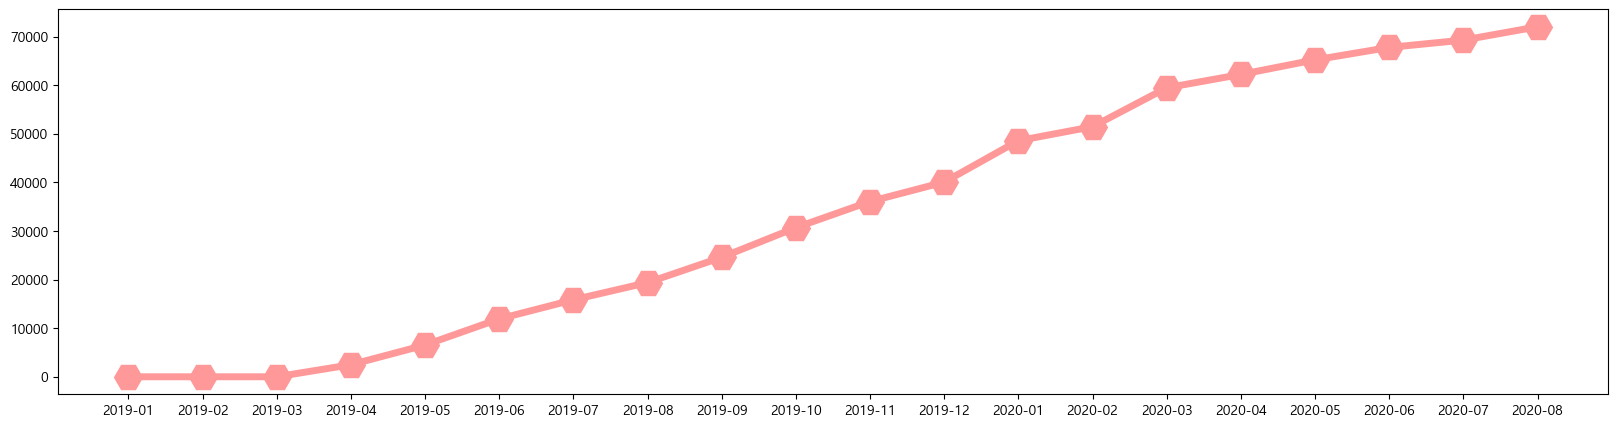

In [65]:
plt.figure(figsize=(20,5))

plt.plot(df_breakaway.sum(),color="#ff9999",linewidth=5,solid_capstyle='round',marker='H',markersize=20)
plt.show()

In [66]:
import numpy as np

count=[]
for i in range(len(sales_pivot_customer)):
    count.append(np.count_nonzero(sales_pivot_customer.iloc[i]))
    
sales_pivot_customer['count']=count
sales_pivot_customer

결제금액                                                  \
구매연월                 2019-01 2019-02 2019-03 2019-04 2019-05 2019-06 2019-07   
고객번호                                                                           
201812310749735          0.0     0.0     0.0     0.0     1.0     0.0     0.0   
201812310749770          0.0     1.0     0.0     0.0     0.0     0.0     0.0   
201812310749771          0.0     0.0     0.0     0.0     1.0     0.0     0.0   
201812310749774          0.0     0.0     0.0     0.0     1.0     0.0     1.0   
201812310749780          1.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                      ...     ...     ...     ...     ...     ...     ...   
20200724113017315991     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200729134409126553     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200803075905757887     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200805170229147688     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20200805223526494551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                                              ...                          \
구매연월                 2019-08 2019-09 2019-10  ... 2019-12 2020-01 2020-02   
고객번호                                          ...                           
201812310749735          0.0     0.0     0.0  ...     0.0     0.0     1.0   
201812310749770          0.0     0.0     0.0  ...     0.0     0.0     0.0   
201812310749771          0.0     0.0     0.0  ...     0.0     0.0     0.0   
201812310749774          0.0     0.0     0.0  ...     0.0     0.0     0.0   
201812310749780          0.0     0.0     0.0  ...     0.0     0.0     0.0   
...                      ...     ...     ...  ...     ...     ...     ...   
20200724113017315991     0.0     0.0     0.0  ...     0.0     0.0     0.0   
20200729134409126553     0.0     0.0     0.0  ...     0.0     0.0     0.0   
20200803075905757887     0.0     0.0     0.0  ...     0.0     0.0     0.0   
20200805170229147688     0.0     0.0     0.0  ...     0.0     0.0     0.0   
20200805223526494551     0.0     0.0     0.0  ...     0.0     0.0     0.0   

                                                                     count  
구매연월                 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08        
고객번호                                                                        
201812310749735          0.0     0.0     0.0     0.0     0.0     0.0     2  
201812310749770          0.0     0.0     0.0     0.0     0.0     0.0     1  
201812310749771          0.0     0.0     0.0     0.0     0.0     0.0     1  
201812310749774          0.0     0.0     0.0     0.0     0.0     0.0     2  
201812310749780          0.0     0.0     0.0     0.0     0.0     0.0     1  
...                      ...     ...     ...     ...     ...     ...   ...  
20200724113017315991     0.0     0.0     0.0     0.0     1.0     0.0     1  
20200729134409126553     0.0     0.0     0.0     0.0     1.0     0.0     1  
20200803075905757887     0.0     0.0     0.0     0.0     0.0     1.0     1  
20200805170229147688     0.0     0.0     0.0     0.0     0.0     1.0     1  
20200805223526494551     0.0     0.0     0.0     0.0     0.0     1.0     1  

[81360 rows x 21 columns]

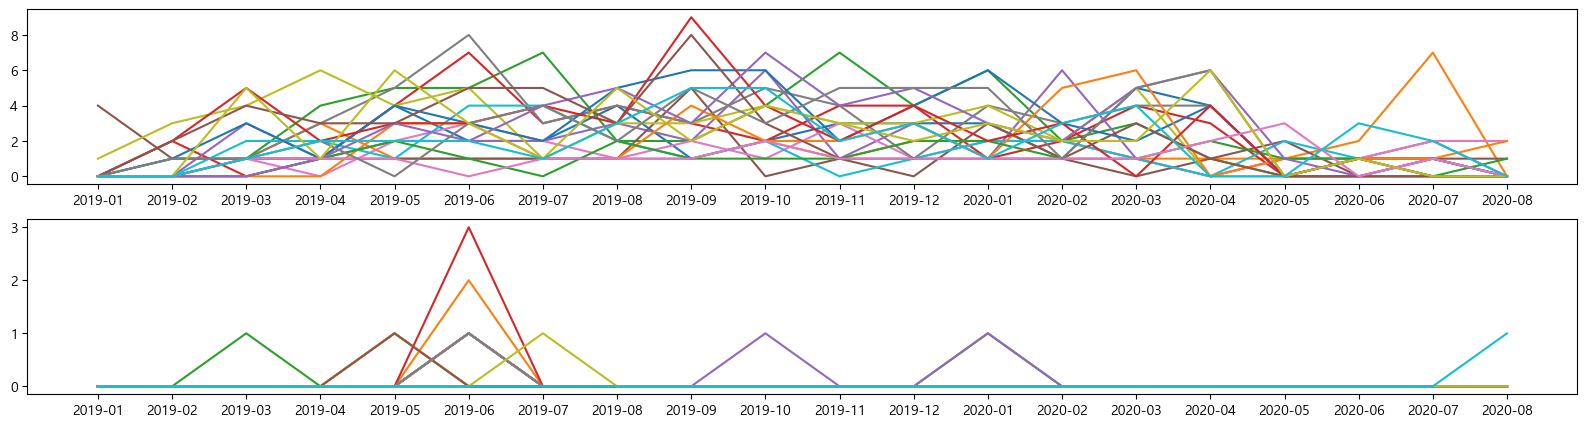

In [67]:
plt.figure(figsize=(20,5))
samples=sales_pivot_customer.sort_values(by='count',ascending=False).head(20).drop(['count'],axis=1)
for i in range(len(samples)):
    plt.subplot(2,1,1)
    plt.plot(samples.iloc[i]['결제금액'])
    
    
samples=sales_pivot_customer.sort_values(by='count',ascending=False).tail(20).drop(['count'],axis=1)
for i in range(len(samples)):
    plt.subplot(2,1,2)
    plt.plot(samples.iloc[i]['결제금액'])
plt.show()
    

In [68]:
merged_data=pd.merge(sales_data,customer_data,how='left',left_on='고객번호',right_on='ID').dropna()
merged_data

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,...,구매일자,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,연령대
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,06,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,30.0
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),...,20,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,30.0
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),...,13,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,30.0
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),...,10,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,30.0
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),...,29,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199577,201912293246297,2019-12-29,2019-12-30,2020-01-01,7.0,201912291058168,52320,37834,기저귀,하기스 네이처메이드 4단계 여아 108매(밴드형),...,29,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0
199578,202001313357732,2020-02-01,2020-02-02,2020-02-04,8.0,201912291058168,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),...,01,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0
199579,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),...,04,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0
199580,20200718082624-57943215331,2020-07-18,2020-07-19,2020-07-23,13.0,201912291058168,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),...,18,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0


In [69]:
merged_data['is_주고객층']=(merged_data['성별']=='여')&(merged_data['결혼유무']=='기혼')&(merged_data['연령대']==30.0)
merged_data

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,...,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,연령대,is_주고객층
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,30.0,True
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),...,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,30.0,True
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),...,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,30.0,True
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),...,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,30.0,False
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),...,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,30.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199577,201912293246297,2019-12-29,2019-12-30,2020-01-01,7.0,201912291058168,52320,37834,기저귀,하기스 네이처메이드 4단계 여아 108매(밴드형),...,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0,False
199578,202001313357732,2020-02-01,2020-02-02,2020-02-04,8.0,201912291058168,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),...,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0,False
199579,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),...,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0,False
199580,20200718082624-57943215331,2020-07-18,2020-07-19,2020-07-23,13.0,201912291058168,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),...,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20.0,False


C:\Users\king\AppData\Local\Temp\ipykernel_13984\3183004569.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=merged_data.groupby('is_주고객층').sum()['결제금액']


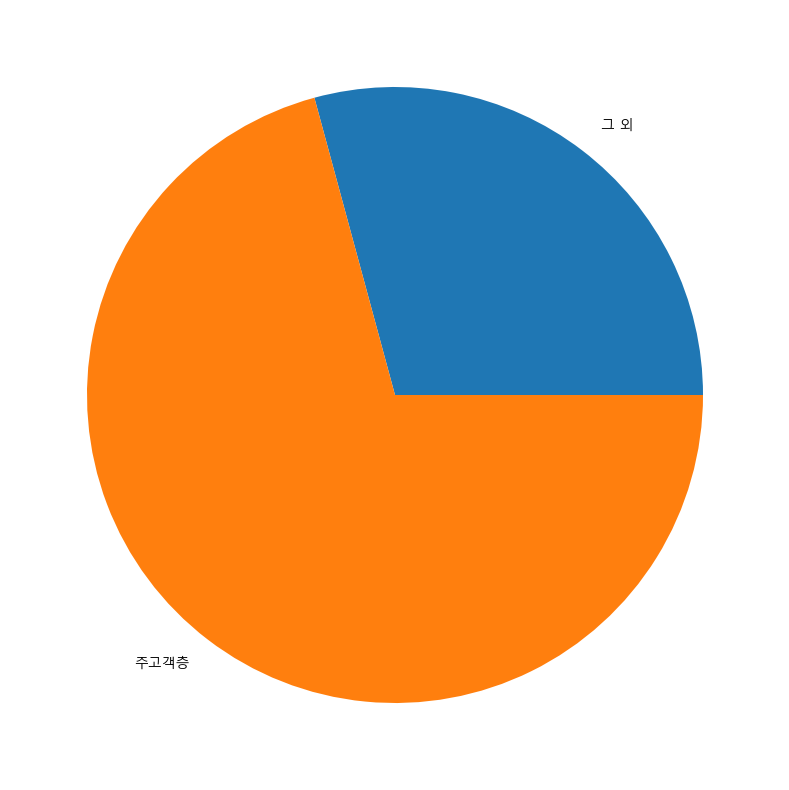

In [70]:
plt.figure(figsize=(15,10))
data=merged_data.groupby('is_주고객층').sum()['결제금액']
plt.pie(data,labels=['그 외','주고객층'])
plt.show()

C:\Users\king\AppData\Local\Temp\ipykernel_13984\2522328138.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=merged_data[merged_data['구매일']=='2019-05-11'].groupby('연령대').sum()['결제금액']
C:\Users\king\AppData\Local\Temp\ipykernel_13984\2522328138.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=merged_data[merged_data['구매일']=='2019-10-11'].groupby('연령대').sum()['결제금액']


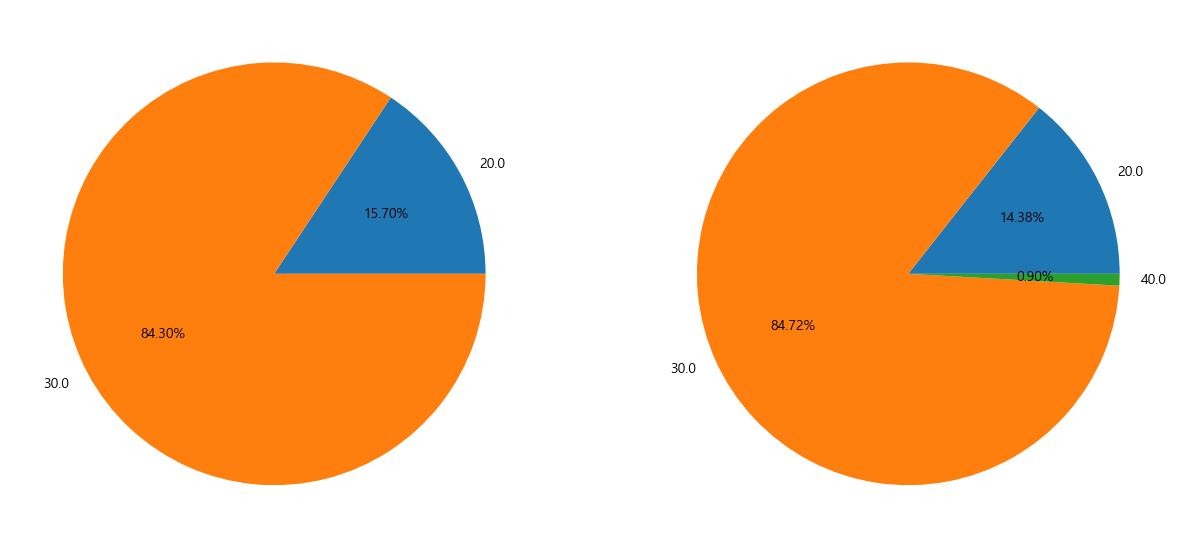

In [71]:
plt.figure(figsize=(15,10))
data=merged_data[merged_data['구매일']=='2019-05-11'].groupby('연령대').sum()['결제금액']
plt.subplot(1,2,1)
plt.pie(data,labels=data.index,autopct='%.2f%%')

data=merged_data[merged_data['구매일']=='2019-10-11'].groupby('연령대').sum()['결제금액']
plt.subplot(1,2,2)
plt.pie(data,labels=data.index,autopct='%.2f%%')
plt.show()

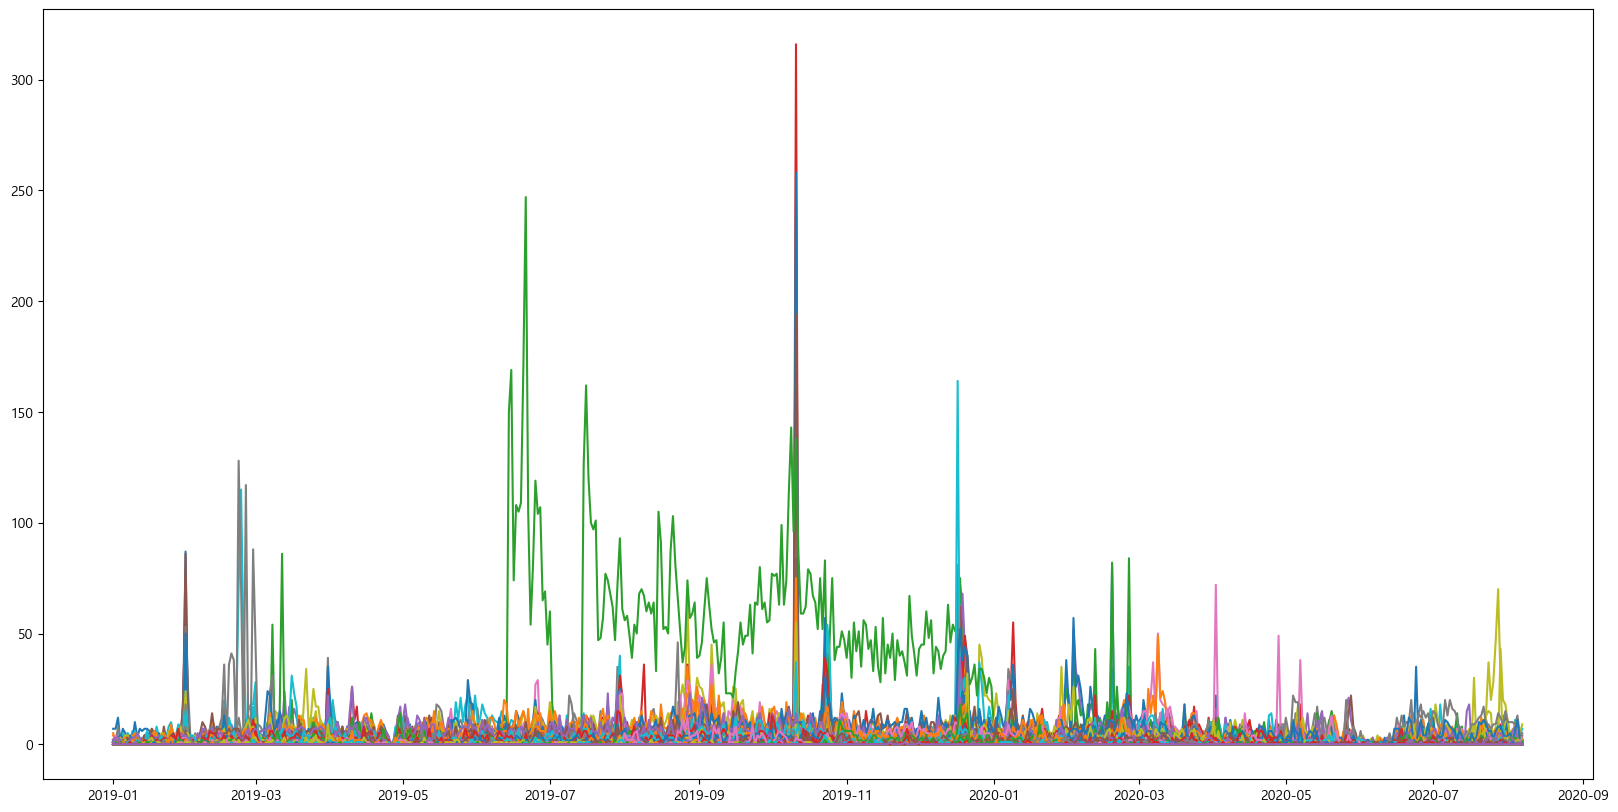

In [72]:
plt.figure(figsize=(20,10))

stock_pivot=pd.pivot_table(sales_data,index=['상품명'],columns=['구매일'],values=['결제금액'],aggfunc='count').fillna(0)

for i in range(len(stock_pivot)):
  plt.plot(stock_pivot['결제금액'].iloc[i])
plt.show()

In [73]:
best_products=list(stock_pivot.sum(axis=1).sort_values(ascending=False).head(1).index)
best_products

['맘큐 허그박스']

In [74]:
len(best_products)

1

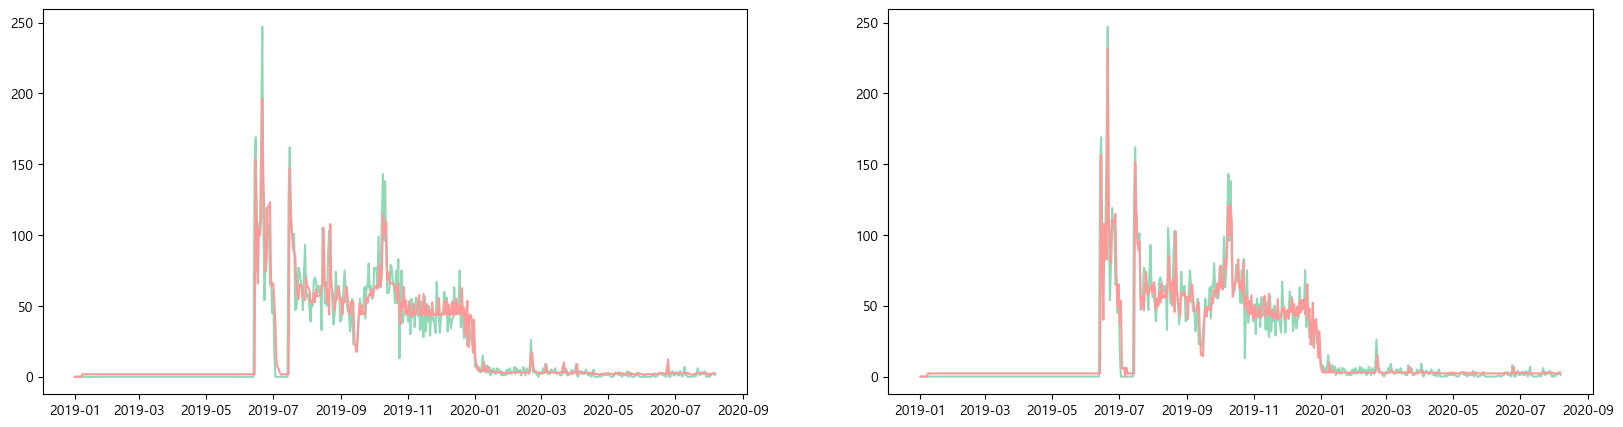

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
plt.figure(figsize=(20,5))
r2_scores={"RandomForestRegressor":[],"GradientBoostingRegressor":[]}
for item in best_products:
  term=7
  df_study=pd.DataFrame(columns=list(range(term))+['target'])
  for i in range(len(stock_pivot.loc[item])-term):
    df_study.loc[i]=stock_pivot.loc[item][i:i+term+1]['결제금액'].values

  x_train,x_test,y_train,y_test=train_test_split(df_study.iloc[:,0:term],df_study['target'],random_state=0)
  std_scaler=StandardScaler()
  std_scaler.fit(x_train)
  x_train_std=std_scaler.transform(x_train)
  x_test_std=std_scaler.transform(x_test)

  clf_rf=RandomForestRegressor(max_depth=4,random_state=0) 
  clf_rf.fit(x_train_std,y_train)

  result=clf_rf.predict(std_scaler.transform(df_study.iloc[:,0:term]))
  data=[0]*7+list(result)

  r2 = r2_score(stock_pivot.loc[item].values, data)
  r2_scores['RandomForestRegressor'].append(r2)

  plt.subplot(len(best_products),2,best_products.index(item)*2+1)
  plt.plot(stock_pivot.loc[item]['결제금액'].index,stock_pivot.loc[item].values,color="#8fd9b6", solid_capstyle='round')
  plt.plot(stock_pivot.loc[item]['결제금액'].index,data,color="#ff9999", solid_capstyle='round')

from sklearn.ensemble import GradientBoostingRegressor

for item in best_products:
  term=7
  df_study=pd.DataFrame(columns=list(range(term))+['target'])
  for i in range(len(stock_pivot.loc[item])-term):
    df_study.loc[i]=stock_pivot.loc[item][i:i+term+1]['결제금액'].values

  x_train,x_test,y_train,y_test=train_test_split(df_study.iloc[:,0:term],df_study['target'],random_state=0)
  std_scaler=StandardScaler()
  std_scaler.fit(x_train)
  x_train_std=std_scaler.transform(x_train)
  x_test_std=std_scaler.transform(x_test)

  gbrt=GradientBoostingRegressor(max_depth=2,random_state=0) 
  gbrt.fit(x_train_std,y_train)

  result=gbrt.predict(std_scaler.transform(df_study.iloc[:,0:term]))
  data=[0]*7+list(result)
  
  r2 = r2_score(stock_pivot.loc[item].values, data)
  r2_scores['GradientBoostingRegressor'].append(r2)

  plt.subplot(len(best_products),2,best_products.index(item)*2+2)
  plt.plot(stock_pivot.loc[item]['결제금액'].index,stock_pivot.loc[item].values,color="#8fd9b6",solid_capstyle='round')
  plt.plot(stock_pivot.loc[item]['결제금액'].index,data,color="#ff9999", solid_capstyle='round')
  plt.plot()
plt.show()

In [76]:
# score_df=pd.DataFrame(r2_scores)
# win_list=[]
# for i in range(len(score_df)):
#   if score_df['RandomForestRegressor'][i]>score_df['GradientBoostingRegressor'][i]:
#     win_list.append('RandomForestRegressor')
#   elif score_df['RandomForestRegressor'][i]<score_df['GradientBoostingRegressor'][i]:    
#     win_list.append('GradientBoostingRegressor')
#   else:
#     win_list.append('Tie')

# score_df['win']=win_list
# score_df

In [77]:
score_df=pd.read_excel('./score_df.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './score_df.xlsx'

In [ ]:
score_df=score_df.drop(['Unnamed: 0'],axis=1)

In [ ]:
score_df.info()

In [ ]:
score_graph_df=pd.DataFrame(columns=['RandomForestRegressor','GradientBoostingRegressor'])
for i in range(1,30):
  score_graph_df.loc[i]=list(score_df.iloc[100*(i-1):100*i].mean())
score_graph_df.index=[x*100 for x in list(score_graph_df.index)]
score_graph_df

In [ ]:
xtick=[x*100 for x in list(score_graph_df.index)]
xtick

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(score_graph_df['RandomForestRegressor'],color="#8fd9b6",solid_capstyle='round',marker='H',markersize=10)
plt.plot(score_graph_df['GradientBoostingRegressor'],color="#ff9999",solid_capstyle='round',marker='H',markersize=10)

plt.show()

In [ ]:
member1=customer_data.copy()
column_names=['성별','결혼유무','거주지역','결제등록카드','유입경로', '자녀여부']
for i in column_names:
  temp_list=member1[i].unique()
  member1[i]=member1[i].apply(lambda x: np.where(temp_list==x)[0][0])

member1

In [ ]:
# 2차원으로 축소
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(member1.iloc[:,1:8])
data=std_scaler.transform(member1.iloc[:,1:8])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)
data_pca.shape

In [ ]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

In [ ]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1번 주성분','2번 주성분'])
plt.colorbar()
plt.xticks(range(7),member1.columns[1:8])
plt.show()

In [ ]:
# # DB scan(밀도 기반으로 클러스터링)
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.3, min_samples =3)

# 시각화를 위한 데이터프레임 생성
df_data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
df_data_pca['cluster'] = dbs.fit_predict(data_pca)

df_data_pca

In [ ]:
for i in df_data_pca['cluster'].unique():
  data=df_data_pca[df_data_pca['cluster']==i]
  plt.scatter(data['PC1'],data['PC2'],color=colors[i])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
df_data_pca['cluster_kmeans']= km.fit_predict(df_data_pca)
df_data_pca

In [ ]:
for i in df_data_pca['cluster_kmeans'].unique():
  data=df_data_pca[df_data_pca['cluster_kmeans']==i]
  plt.scatter(data['PC1'],data['PC2'],color=colors[i])
plt.show()

In [ ]:
customer_data['클러스터']=df_data_pca['cluster']
customer_data['연령대']=customer_data['연령'].apply(lambda x: int((x//10)*10))

customer_data

In [ ]:
plt.figure(figsize=(30,20))
pie_chart_list=['결혼유무','자녀여부']

for i in range(len(pie_chart_list)):
    data=customer_data[customer_data['클러스터']==0].groupby(pie_chart_list[i]).count()['ID']
    plt.subplot(2,4,i+1)
    plt.pie(data,colors=colors)

plt.show()

In [ ]:
plt.figure(figsize=(30,20))
pie_chart_list=['성별','결혼유무','거주지역','결제등록카드','유입경로','자녀여부','연령대']

for i in range(len(pie_chart_list)):
    data=customer_data[customer_data['클러스터']==1].groupby(pie_chart_list[i]).count()['ID']
    plt.subplot(2,4,i+1)
    plt.title(pie_chart_list[i])
    plt.pie(data,labels=data.index)

plt.show()

In [ ]:
plt.figure(figsize=(30,20))
pie_chart_list=['성별','결혼유무','거주지역','결제등록카드','유입경로','자녀여부','연령대']

for i in range(len(pie_chart_list)):
    data=customer_data[customer_data['클러스터']==2].groupby(pie_chart_list[i]).count()['ID']
    plt.subplot(2,4,i+1)
    plt.title(pie_chart_list[i])
    plt.pie(data,labels=data.index)

plt.show()

In [ ]:
df_sales_member=pd.merge(sales_data,customer_data,how='left',left_on='고객번호',right_on='ID').dropna()
df_sales_member

In [ ]:
cluster_pivot=pd.pivot_table(df_sales_member,index=['클러스터'],columns=['물품대분류'],values=['결제금액'],aggfunc='sum').fillna(0)
cluster_pivot

In [ ]:
plt.figure(figsize=(20,40))

for i in range(len(cluster_pivot)-1):
  data=cluster_pivot.loc[i]['결제금액'].sort_values(ascending=True)
  plt.subplot(len(cluster_pivot)-1,1,i+1)
  plt.barh(data.index,data)
  plt.title(f'{i}번그룹')
plt.show()


In [ ]:
df_hue=df_sales_member.groupby(['물품대분류','클러스터'])['결제금액'].sum().reset_index()
df_hue

plt.figure(figsize=(30,15))
sns.barplot(data=df_hue,y='물품대분류',x='결제금액',hue='클러스터')
plt.show()